## Title :
Exercise: Linear and Polynomial Regression with Residual Analysis

## Description :
The goal of this exercise is to fit linear regression and polynomial regression to the given data. Plot the fit curves of both the models along with the data and observe what the residuals tell us about the two fits. 

<img src="../fig/fig2.png" style="width: 500px;">

## Data Description:

## Instructions:
- Read the poly.csv file into a dataframe.
- Split the data into train and test subsets.
- Fit a linear regression model on the entire data, using `LinearRegression()` object from Sklearn library.
- Guesstimate the degree of the polynomial which would best fit the data.
- Fit a polynomial regression model on the computed Polynomial Features using `LinearRegression()` object from sklearn library.
- Plot the linear and polynomial model predictions along with the test data.
- Compute the polynomial and linear model residuals using the formula below $\epsilon = y_i - \hat{y}$
- Plot the histogram of the residuals and comment on your choice of the polynomial degree. 

## Hints: 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html" target="_blank">pd.DataFrame.head()</a>
Returns a pandas dataframe containing the data and labels from the file data.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.model_selection.train_test_split()</a>
Splits the data into random train and test subsets.

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a>
Create a figure and a set of subplots.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.preprocessing.PolynomialFeatures()</a>
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">sklearn.preprocessing.StandardScaler.fit_transform()</a>
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.linear_model.LinearRegression</a>
LinearRegression fits a linear model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.linear_model.LinearRegression.fit()</a>
Fits the linear model to the training data.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.linear_model.LinearRegression.predict()</a>
Predict using the linear model.

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">plt.plot()</a>
Plots x versus y as lines and/or markers.

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html" target="_blank">plt.axvline()</a>
Add a vertical line across the axes.

<a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html" target="_blank">ax.hist()</a>
Plots a histogram.

**Note:** This exercise is auto-graded and you can try multiple attempts. 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [3]:
# Read the data from 'poly.csv' into a Pandas dataframe
df = pd.read_csv('C:\\Users\\Araceli\\OneDrive - ETH Zurich\\Documentos\\ARACELI OTROS\\GitHub\\2021-CS109A\\content\\lectures\\lecture04\\data\\poly.csv')

# Take a quick look at the dataframe
df.head()


,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [4]:
# Get the column values for x & y as numpy arrays
x = df[['x']].values
y = df['y'].values


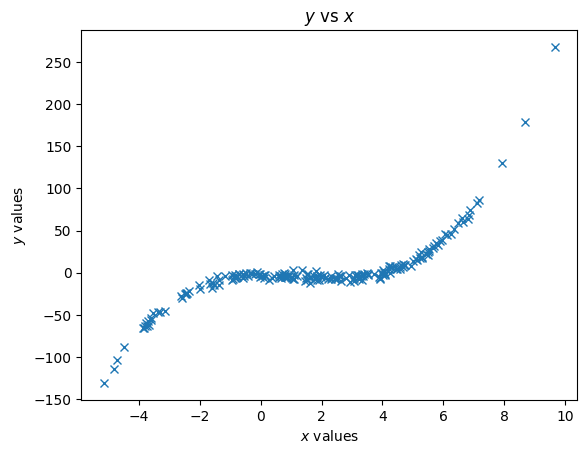

In [5]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show();


In [6]:
# Split the data into train and test sets
# Set the train size to 0.8 and random state to 22
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=22)


In [7]:
# Initialize a linear model
model = LinearRegression()

# Fit the model on the train data
model.fit(x_train, y_train)

# Get the predictions on the test data using the trained model
y_lin_pred = model.predict(x_test)


In [16]:
### edTest(test_deg) ###

# Guess the correct polynomial degree based on the above graph
guess_degree = 2

# Generate polynomial features on the train data
x_poly_train= PolynomialFeatures(degree=guess_degree).fit_transform(x_train)

# Generate polynomial features on the test data
x_poly_test= PolynomialFeatures(degree=guess_degree).fit_transform(x_test)


In [17]:
# Initialize a model to perform polynomial regression
polymodel = LinearRegression(fit_intercept=False)

# Fit the model on the polynomial transformed train data
polymodel.fit(x_poly_train, y_train)

# Predict on the entire polynomial transformed test data
y_poly_pred = polymodel.predict(x_poly_test)


In [18]:
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y_test
# y_test values corresponding to sorted test data
y_test = y_test[idx]

# Linear predicted values  
y_lin_pred = y_lin_pred[idx]

# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]


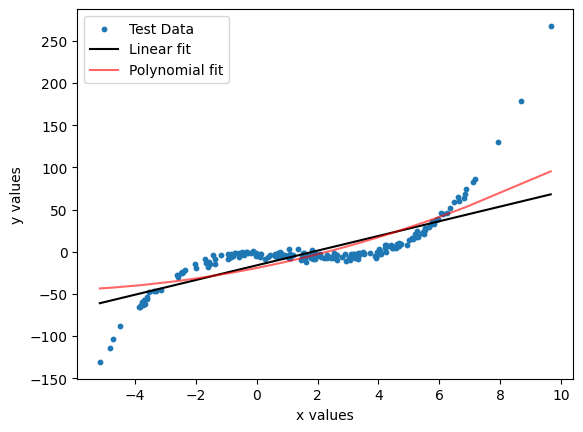

In [19]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Test Data")

# Plot the linear regression fit curve
plt.plot(x_test, y_lin_pred, label="Linear fit", color='k')

# Plot the polynomial regression fit curve
plt.plot(x_test, y_poly_pred, label="Polynomial fit", color='red', alpha=0.6)

# Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show();


In [20]:
### edTest(test_poly_predictions) ###
# Calculate the residual values for the polynomial model
poly_residuals = y_test - y_poly_pred


In [21]:
### edTest(test_linear_predictions) ###
# Calculate the residual values for the linear model
lin_residuals = y_test - y_lin_pred


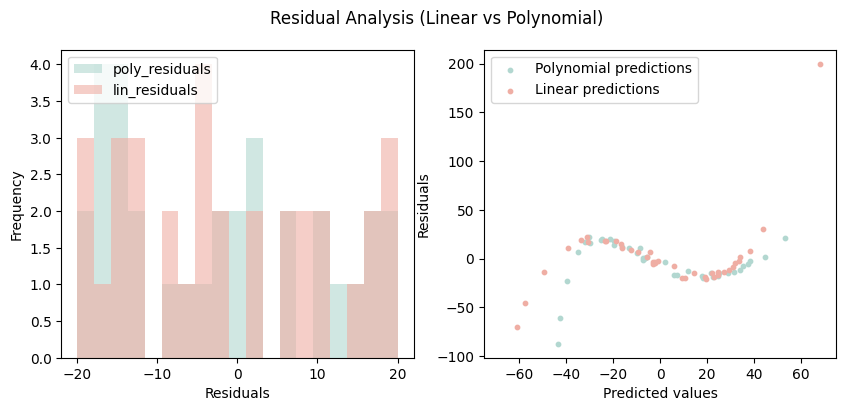

In [22]:
# Helper code to plot the residual values
# Plot the histograms of the residuals for the two cases

# Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins, label = "poly_residuals", color='#B2D7D0', alpha=0.6)

# Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = "lin_residuals", color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predictions')
ax[1].scatter(y_lin_pred, lin_residuals, s = 10, color='#EFAEA4', label='Linear predictions' )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')

fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show();


⏸ Do you think that polynomial degree is appropriate. Experiment with a degree of polynomial of 2 and comment on what you observe for the residuals?

In [49]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = '2 is better'
